In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 6489-7534

 Directory of C:\Users\Dell\Desktop\New folder

14-01-2023  01:13    <DIR>          .
14-01-2023  01:09    <DIR>          ..
14-01-2023  01:12    <DIR>          .ipynb_checkpoints
28-12-2022  13:08             2,436 50_Startups (1).csv
26-12-2022  17:18             2,436 50_Startups.csv
11-01-2023  21:19           754,033 50strtup.ipynb
03-01-2023  16:38           111,916 association book.ipynb
03-01-2023  17:12           162,936 association.movies.ipynb
29-12-2022  16:49         4,610,348 bank-full.csv
03-01-2023  17:13           536,483 book (1).csv
30-12-2022  17:35            46,094 book.csv
06-01-2023  22:53           141,306 clustering1(c.ipynb
14-01-2023  01:12           187,554 Crime_Clustring.ipynb
06-01-2023  20:56             1,328 crime_data.csv
21-12-2022  23:48            59,182 delivery.slr.ipynb
28-12-2022  12:23               218 delivery_time.csv
06-01-2023  20:56           268,963 EastWestAirlines.x

In [3]:
df=pd.read_csv("crime_data.csv")

In [4]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


# Scaling info

# Hierarchical

In [5]:
#normalization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [6]:
df1_n = norm_func(df.iloc[:,1:])

In [7]:
df1_n.iloc[:,:]

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


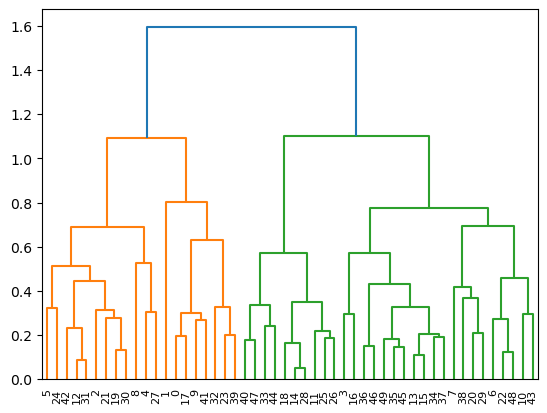

In [8]:
dendogram=sch.dendrogram(sch.linkage(df1_n, method='complete'))

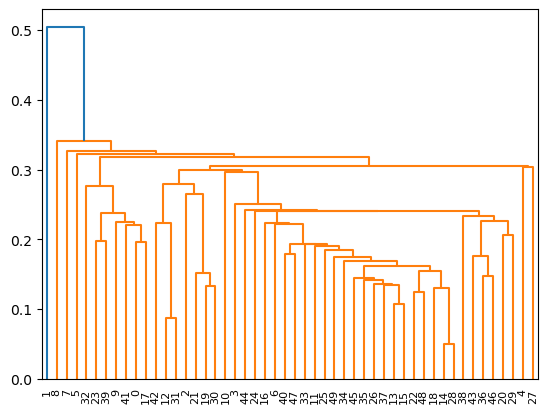

In [9]:
dendogram=sch.dendrogram(sch.linkage(df1_n, method='single'))

In [10]:
hi = AgglomerativeClustering(n_clusters=5, affinity='euclidean',linkage='complete')

In [11]:
hi.fit_predict(df1_n)

array([3, 4, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       0, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 0, 0], dtype=int64)

In [12]:
y_hi = hi.fit_predict(df1_n)

In [13]:
df['h_clusterid'] = y_hi

In [14]:
df.head(3)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,1


In [15]:
df.groupby(["h_clusterid"])["Unnamed: 0"].apply(lambda x:tuple(x))

h_clusterid
0    (Arkansas, Connecticut, Delaware, Hawaii, Indi...
1    (Arizona, California, Colorado, Florida, Illin...
2    (Idaho, Iowa, Maine, Montana, Nebraska, New Ha...
3    (Alabama, Georgia, Louisiana, Mississippi, Nor...
4                                            (Alaska,)
Name: Unnamed: 0, dtype: object

# K Means

In [16]:
df  = pd.read_csv("crime_data.csv")

In [17]:
fd_norm = norm_func(df.iloc[:,1:])

In [18]:
from sklearn.cluster import KMeans

In [19]:
model_kmeans = KMeans(n_clusters=5)
model_kmeans.fit(fd_norm)

KMeans(n_clusters=5)

In [20]:
model_kmeans.labels_

array([3, 0, 0, 4, 0, 0, 2, 4, 0, 3, 2, 1, 0, 4, 1, 4, 4, 3, 1, 0, 2, 0,
       1, 3, 4, 1, 1, 0, 1, 2, 0, 0, 3, 1, 2, 4, 4, 2, 2, 3, 1, 3, 0, 2,
       1, 4, 2, 1, 1, 4])

In [21]:
dm=pd.Series(model_kmeans.labels_)

In [22]:
df["labels"]=pd.Series(model_kmeans.labels_)

In [23]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,labels
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,4
4,California,9.0,276,91,40.6,0


In [24]:
df.groupby(["labels"])["Unnamed: 0"].apply(lambda x:tuple(x))

labels
0    (Alaska, Arizona, California, Colorado, Florid...
1    (Idaho, Iowa, Maine, Minnesota, Montana, Nebra...
2    (Connecticut, Hawaii, Massachusetts, New Jerse...
3    (Alabama, Georgia, Louisiana, Mississippi, Nor...
4    (Arkansas, Delaware, Indiana, Kansas, Kentucky...
Name: Unnamed: 0, dtype: object

In [25]:
df[df["Unnamed: 0"].isin(["Arkansas", "Delaware", "Indiana", "Kansas"])]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,labels
3,Arkansas,8.8,190,50,19.5,4
7,Delaware,5.9,238,72,15.8,4
13,Indiana,7.2,113,65,21.0,4
15,Kansas,6.0,115,66,18.0,4


# DBSCAN

In [26]:
from sklearn.cluster import DBSCAN
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

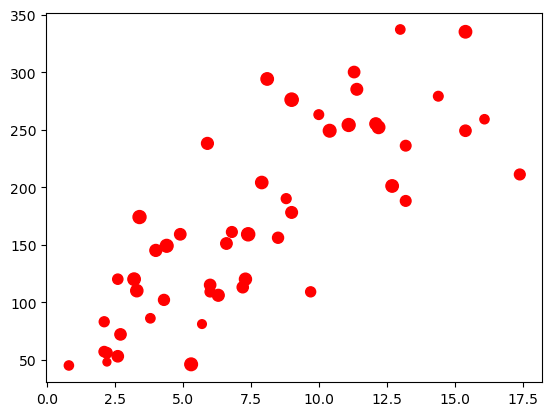

In [27]:
ds=DBSCAN(min_samples=3,eps=0.3)
class_pr=ds.fit_predict(df.iloc[:,1:5])
plt.scatter(df['Murder'],df['Assault'],df['UrbanPop'],c=class_pr,cmap=plt.cm.rainbow_r)

# finding the optimal number of cluster

In [28]:
df=pd.read_csv("crime_data.csv")

In [29]:
df.sample(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
17,Louisiana,15.4,249,66,22.2
22,Minnesota,2.7,72,66,14.9
45,Virginia,8.5,156,63,20.7
18,Maine,2.1,83,51,7.8
46,Washington,4.0,145,73,26.2
48,Wisconsin,2.6,53,66,10.8
8,Florida,15.4,335,80,31.9
15,Kansas,6.0,115,66,18.0
5,Colorado,7.9,204,78,38.7
26,Nebraska,4.3,102,62,16.5


In [30]:
cr=[1,2,3,4,5,6,7,8,9]
iner=[]
for i in cr:
    km=KMeans(i)
    km.fit(df.iloc[:,[1,2,3,4]])
    iner.append(km.inertia_)

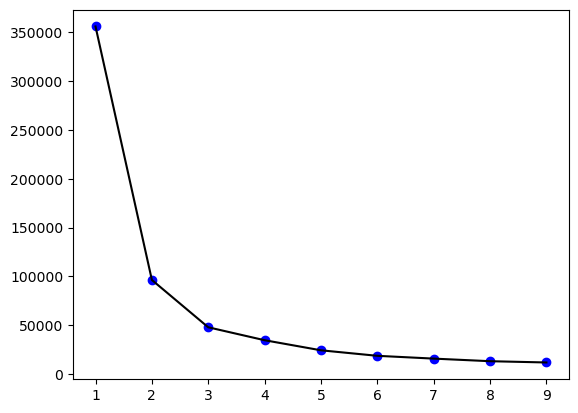

In [31]:
plt.plot(cr,iner,color="black")
plt.scatter(cr,iner,color="blue")
plt.show()

# Silhouette_Score

In [32]:
from sklearn.metrics import silhouette_score as sil

In [34]:
bc=[2,3,4,5,6,7,8,9]
sc_s=[]
for i in bc:
    hc = AgglomerativeClustering(n_clusters=i, affinity= 'euclidean',linkage='complete')
    y=hc.fit_predict(df.iloc[:,[1,2,3]])
    sc_s.append(sil(df.iloc[:,[1,2,3]],y))

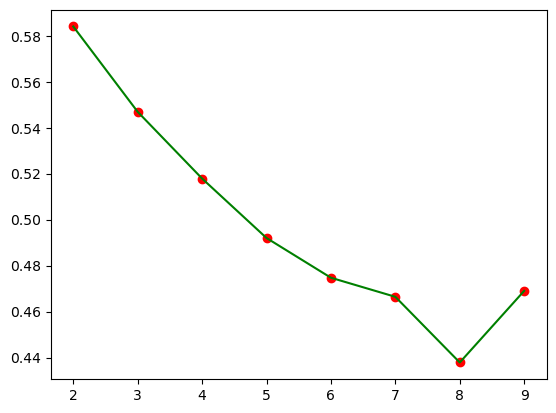

In [38]:
plt.plot(bc,sc_s,color="green")
plt.scatter(bc,sc_s,color="red")